In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add the project root to the path so we can import from 'src'
sys.path.append(os.path.abspath(os.path.join('../')))

from src.data_loader import DataLoader

# Initialize the loader (default dir is ../data/raw)
loader = DataLoader()

In [2]:
creditcard_data = loader.load_csv('creditcard.csv')
print(creditcard_data.head())

2025-12-22 11:57:19,596 - INFO - Loading data from ../data/raw\creditcard.csv...
2025-12-22 11:57:20,790 - INFO - Successfully loaded creditcard.csv with shape (284807, 31)


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
print("\n--- credit card data  Shape ---")
print(creditcard_data.shape)

print("\n--- credit card data Info (Types and Nulls) ---")
print(creditcard_data.info())



--- credit card data  Shape ---
(284807, 31)

--- credit card data Info (Types and Nulls) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  floa

In [4]:
print("Missing values per column:\n", creditcard_data.isnull().sum())


Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
duplicate_count = creditcard_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 1081


2025-12-22 11:57:35,931 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\Abenezer\AppData\Local\Temp\ipykernel_34916\237235574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=creditcard_data, palette='magma')
2025-12-22 11:57:36,102 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


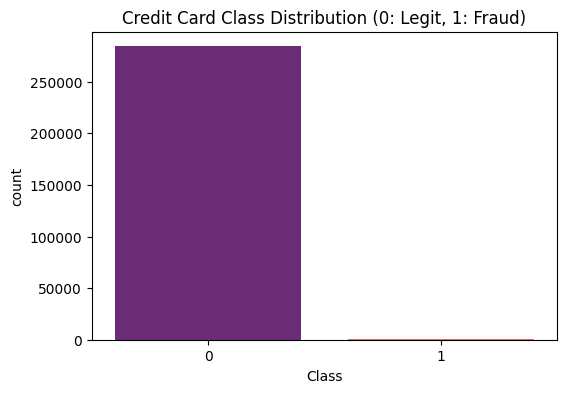

Legit: 284315 (99.827%)
Fraud: 492 (0.173%)


In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=creditcard_data, palette='magma')
plt.title('Credit Card Class Distribution (0: Legit, 1: Fraud)')
plt.show()

counts = creditcard_data['Class'].value_counts()
percent = creditcard_data['Class'].value_counts(normalize=True) * 100
print(f"Legit: {counts[0]} ({percent[0]:.3f}%)")
print(f"Fraud: {counts[1]} ({percent[1]:.3f}%)")

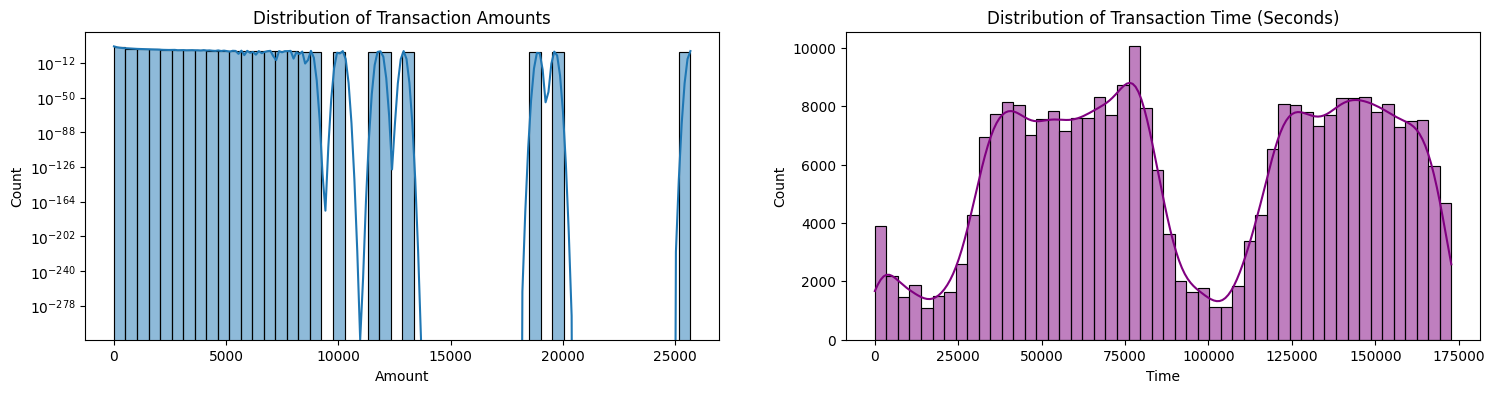

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Transaction Amount Distribution
sns.histplot(creditcard_data['Amount'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Transaction Amounts')
ax[0].set_yscale('log') # Use log scale because most amounts are small

# Transaction Time Distribution
sns.histplot(creditcard_data['Time'], bins=50, kde=True, color='purple', ax=ax[1])
ax[1].set_title('Distribution of Transaction Time (Seconds)')

plt.show()

2025-12-22 11:57:58,167 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\Abenezer\AppData\Local\Temp\ipykernel_34916\2619407999.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='V14', data=creditcard_data, ax=ax[0], palette='Set2')
2025-12-22 11:57:58,346 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-12-22 11:57:58,659 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotti

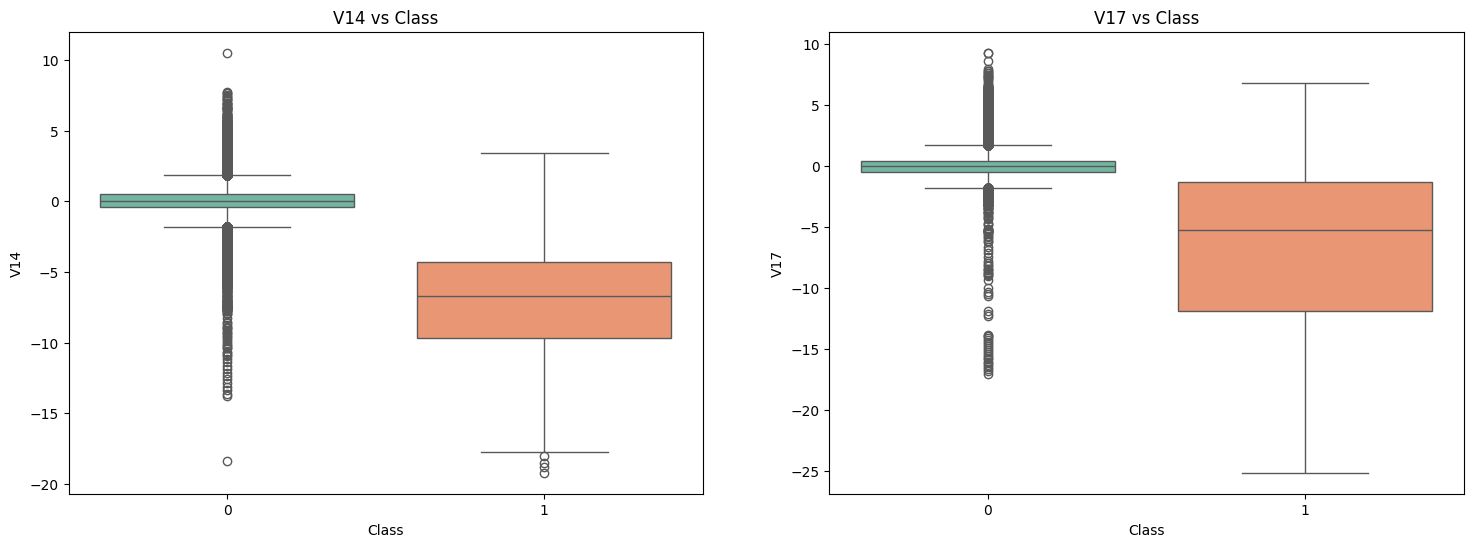

In [8]:
# Look at V14 and V17 (often strong indicators in this dataset)
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(x='Class', y='V14', data=creditcard_data, ax=ax[0], palette='Set2')
ax[0].set_title('V14 vs Class')

sns.boxplot(x='Class', y='V17', data=creditcard_data, ax=ax[1], palette='Set2')
ax[1].set_title('V17 vs Class')

plt.show()

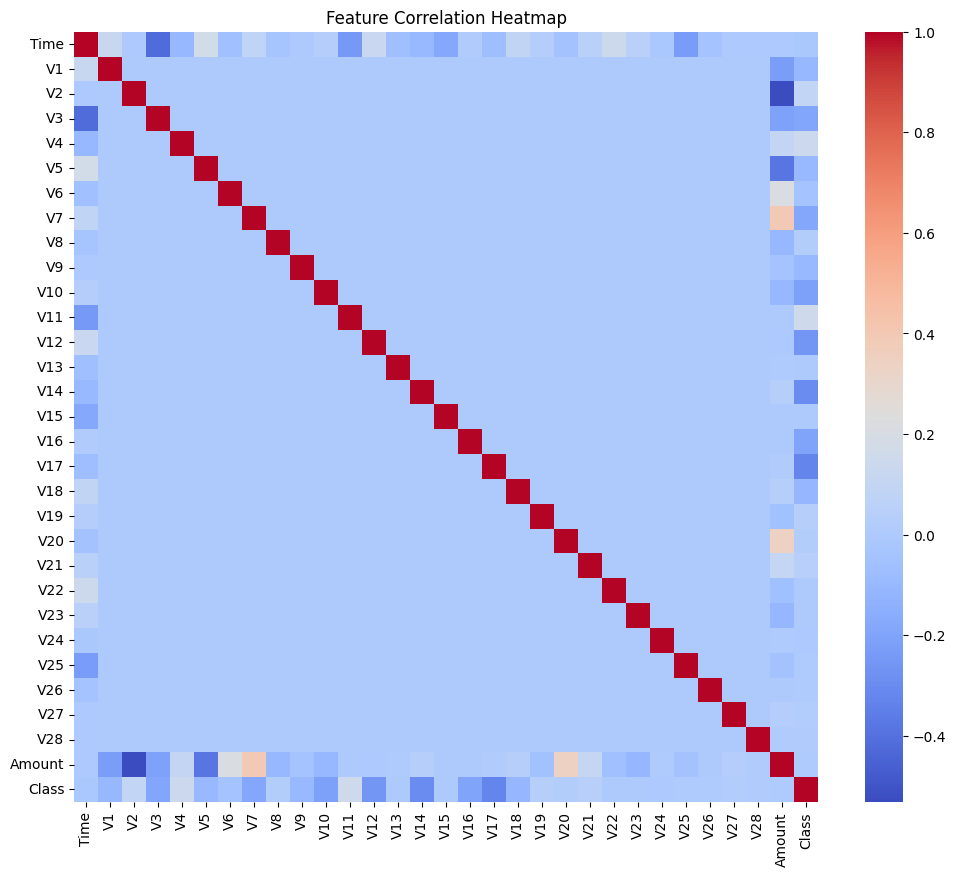

In [9]:
plt.figure(figsize=(12, 10))
corr = creditcard_data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()